by Yigao Li

# Exercise 1

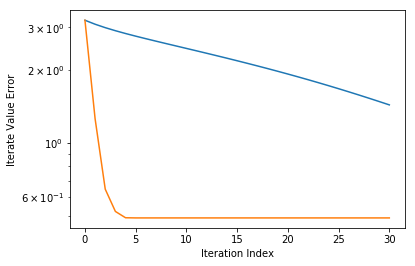

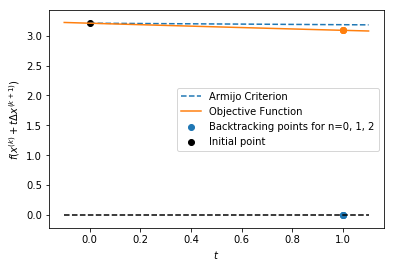

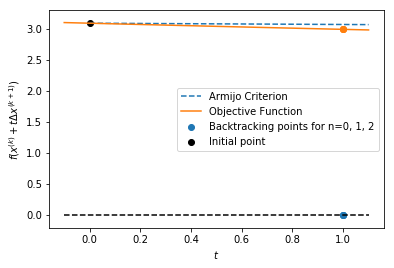

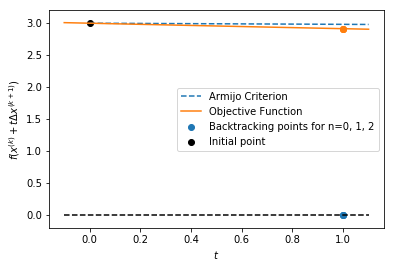

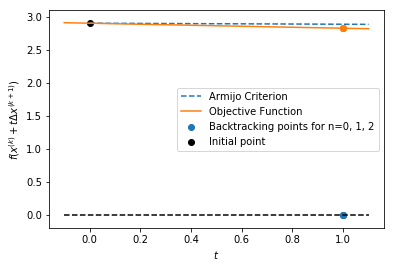

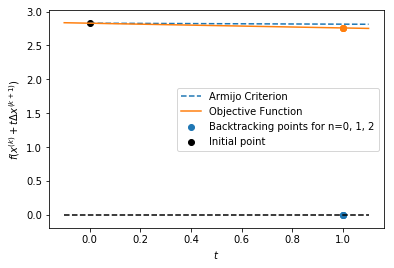

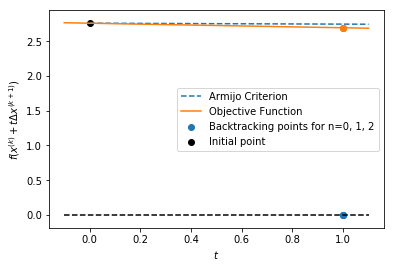

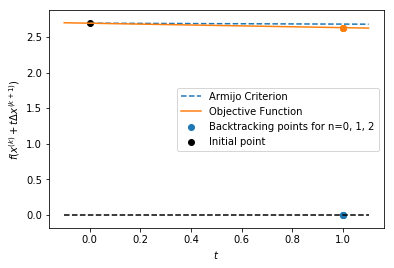

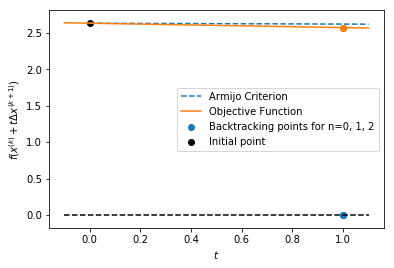

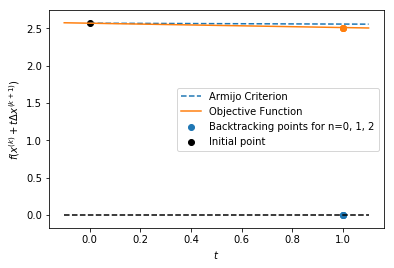

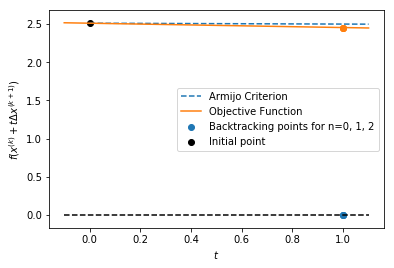

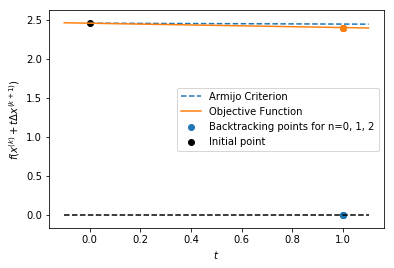

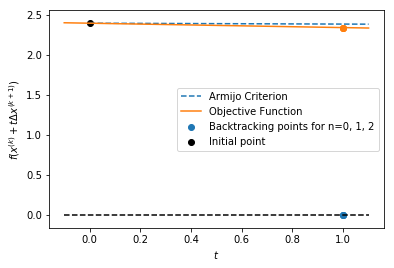

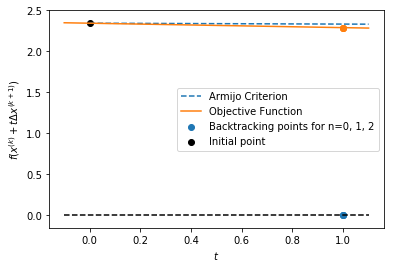

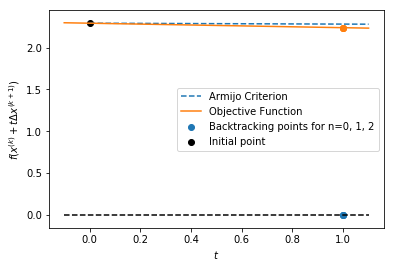

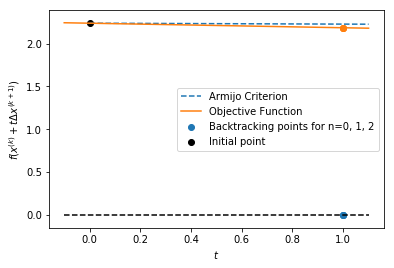

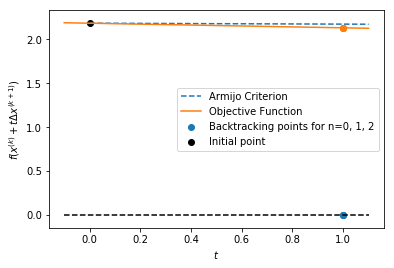

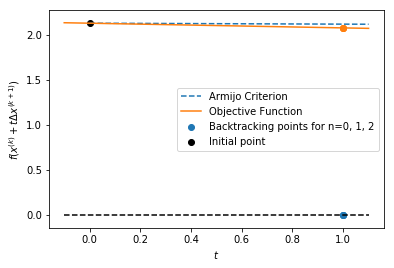

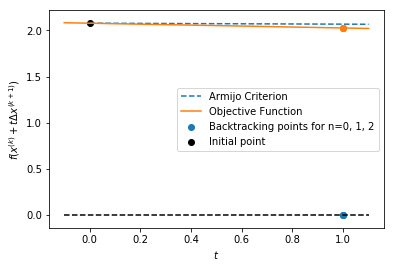

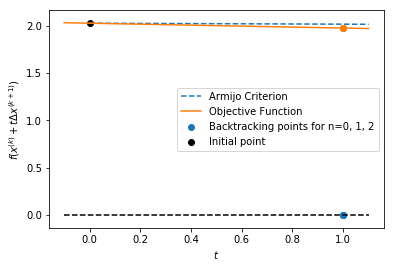

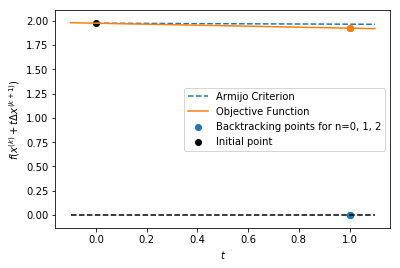

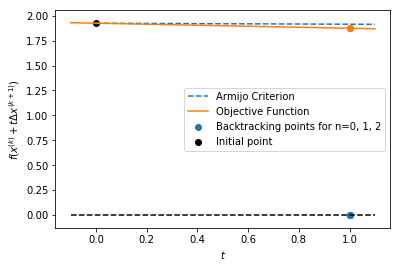

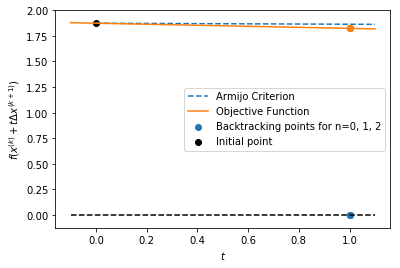

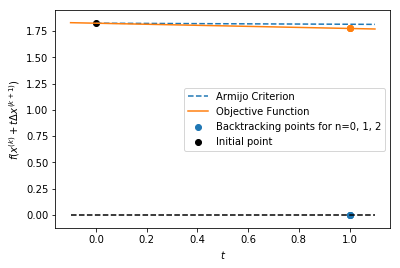

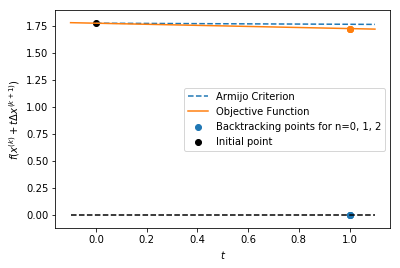

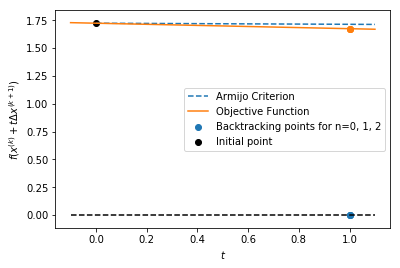

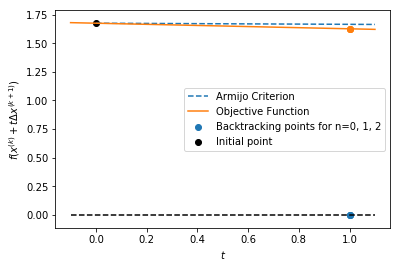

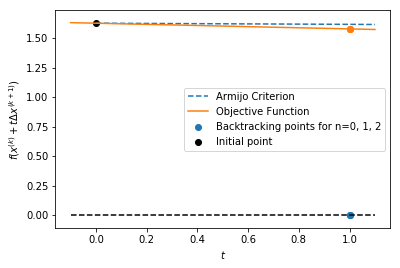

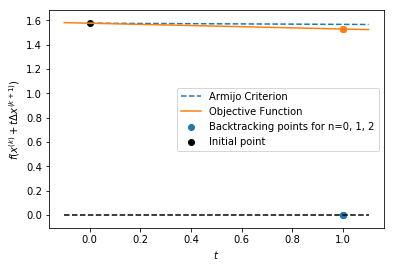

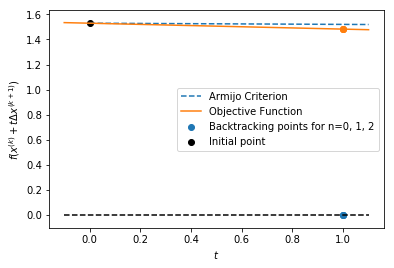

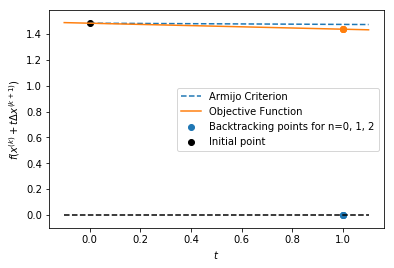

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


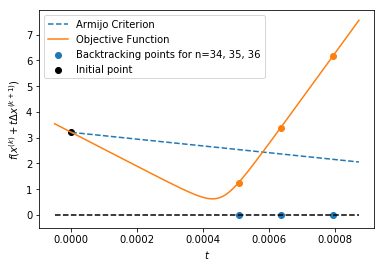

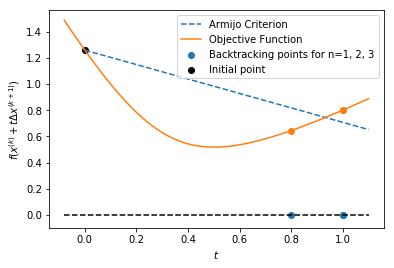

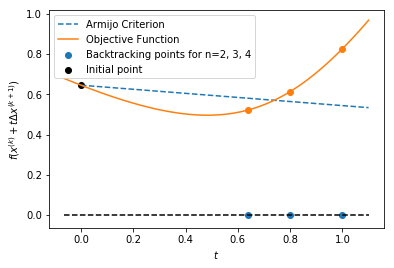

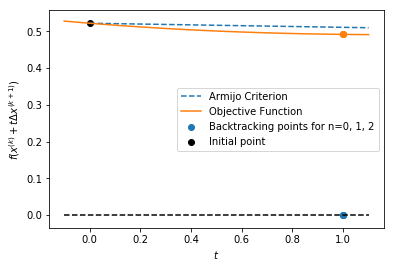

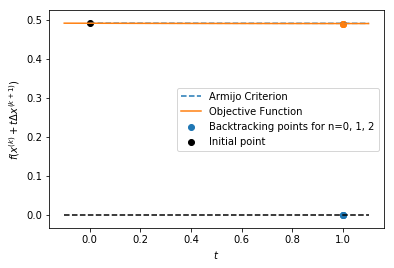

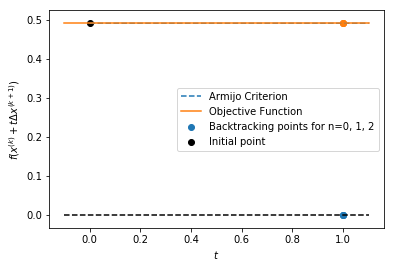

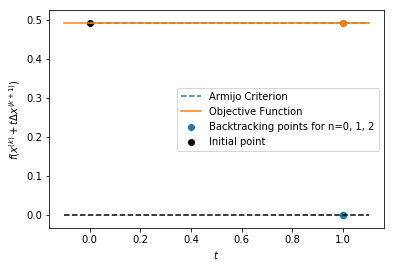

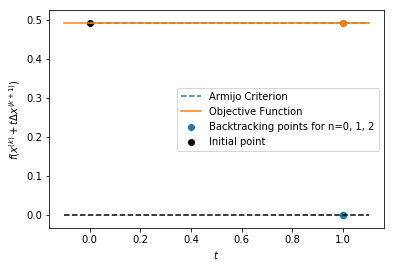

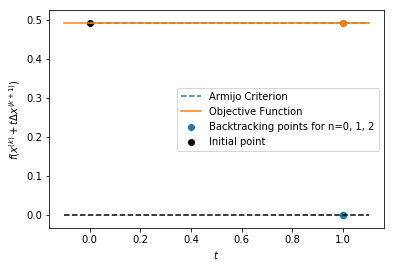

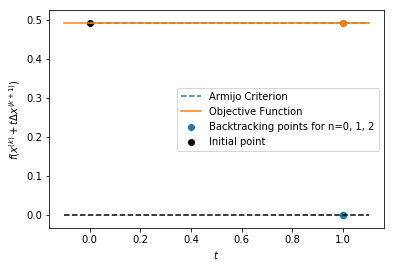

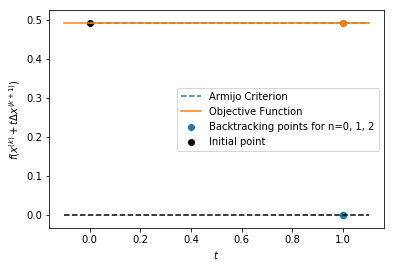

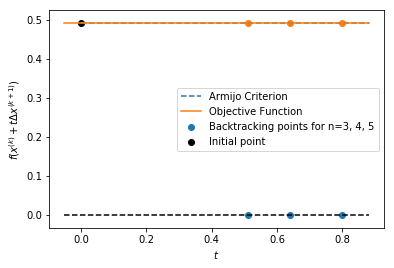

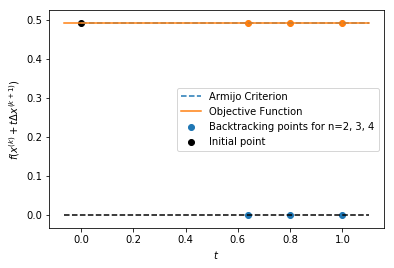

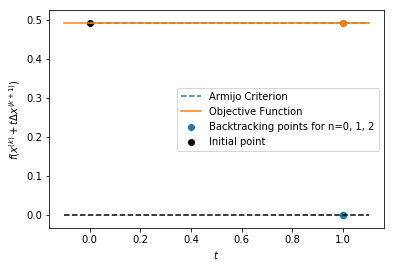

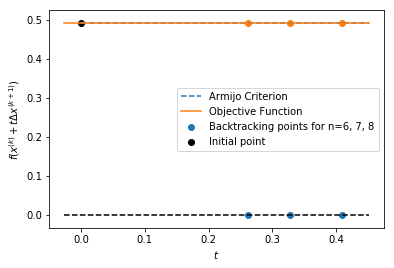

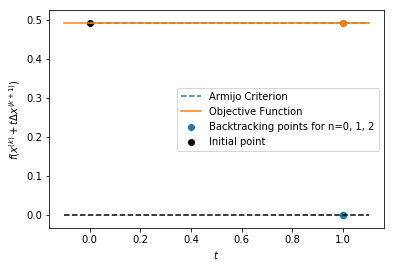

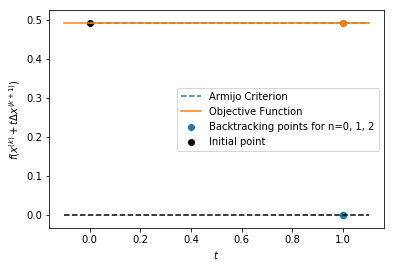

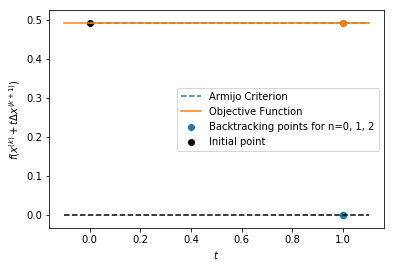

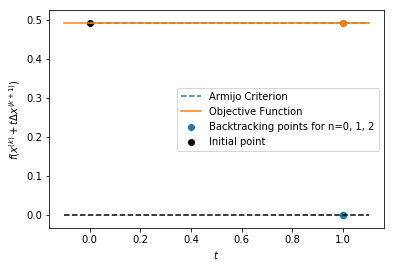

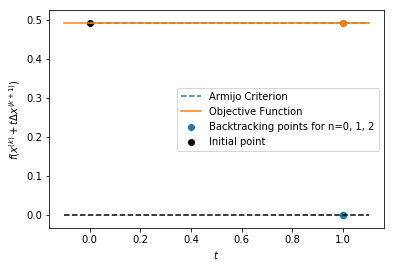

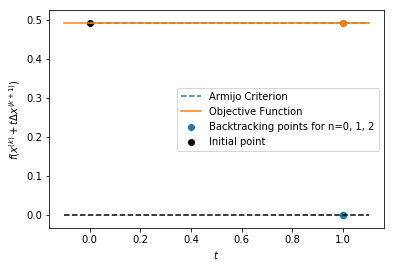

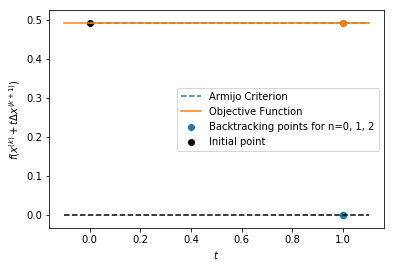

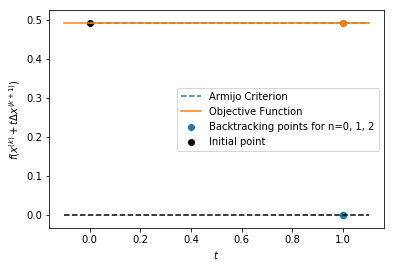

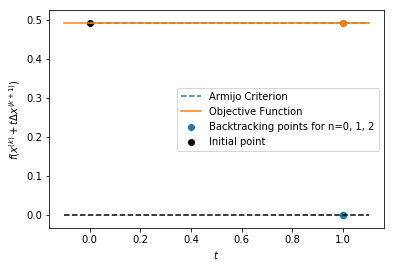

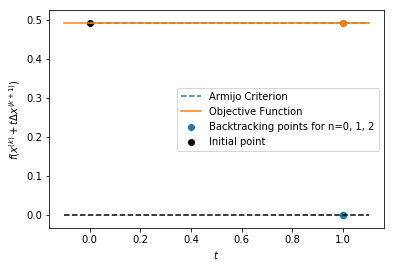

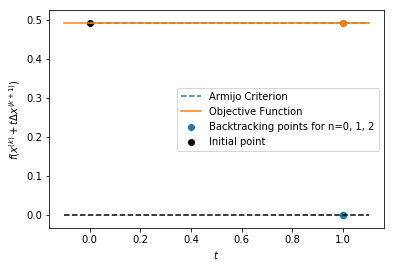

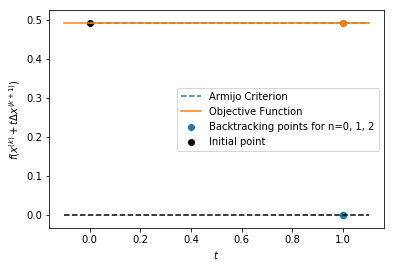

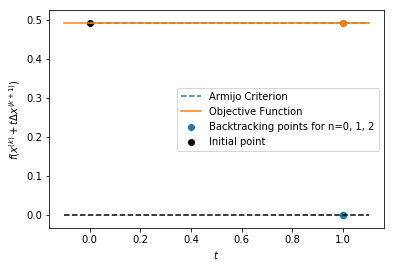

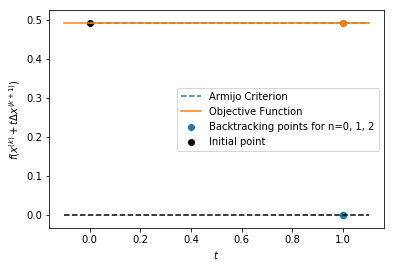

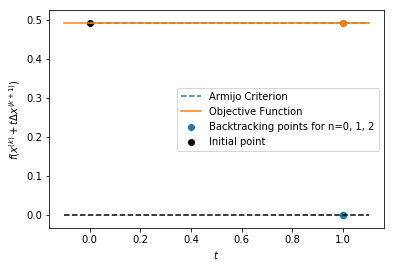

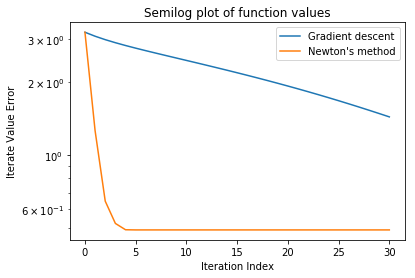

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_objective(x,y):
    N = len(x)
    f = lambda beta: sum(np.log(1+np.e**(-y*(beta[0]+beta[1]*x))))/N
    return f

def dlogistic_objective(x,y):
    N = len(x)
    df = lambda beta: np.array([sum(-y*np.e**(-y*(beta[0]+beta[1]*x))/(1+np.e**(-y*(beta[0]+beta[1]*x))))/N,
                   sum(-x*y*np.e**(-y*(beta[0]+beta[1]*x))/(1+np.e**(-y*(beta[0]+beta[1]*x))))/N])
    return df

def d2logistic_objective(x,y):
    N = len(x)
    d2f = lambda beta: np.matrix([[sum(y**2*np.e**(-y*(beta[0]+beta[1]*x))/(1+np.e**(-y*(beta[0]+beta[1]*x)))**2)/N,
                     sum(x*y**2*np.e**(-y*(beta[0]+beta[1]*x))/(1+np.e**(-y*(beta[0]+beta[1]*x)))**2)/N],
                    [sum(x*y**2*np.e**(-y*(beta[0]+beta[1]*x))/(1+np.e**(-y*(beta[0]+beta[1]*x)))**2)/N,
                    sum((x*y)**2*np.e**(-y*(beta[0]+beta[1]*x))/(1+np.e**(-y*(beta[0]+beta[1]*x)))**2)/N]])
    return d2f

def backtracking(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(ts, [0 for p in ts], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(ts, [f(x0 + q*dx) for q in ts] , label='Backtracking values for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([0], [f0], color='black', label='Initial point')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
        
        return x, xs, fs
    
    else:
        return x
    
def procPointValue(p, f):
    x = []
    y = []
    z = []
    for i in range(len(f)):
        x.append(p[i][0])
        y.append(p[i][1])
        z.append(f[i])
    
    return np.vstack([x, y, z]).T

def main():
    x = np.array([-1, -1, -1, 0, 0, 0, 1, 1, 1, 1])
    y = np.array([-1, -1, -1, 1, -1, 1, 1, 1, 1, -1])
    fun = logistic_objective(x,y)
    dfun = dlogistic_objective(x,y)
    d2fun = d2logistic_objective(x,y)
    iter = 30
    beta0 = np.array([10,10])
    b_gd = beta0
    b_newt = beta0
    dx_gd = lambda beta0: -dfun(beta0)
    dx_newt = lambda beta0: -np.linalg.solve(d2fun(beta0), dfun(beta0))
    beta_gd = [beta0]
    fun_gd = [fun(beta0)]
    beta_newt = [beta0]
    fun_newt = [fun(beta0)]
    for i in range(iter):
        b_gd, bs_gd, fs_gd = backtracking(b_gd, dx_gd(b_gd), fun, dfun(b_gd), alpha = 0.2, beta = 0.8, verbose = True)
        beta_gd.append(b_gd)
        fun_gd.append(fun(b_gd))
    for j in range(iter):
        b_newt,bs_newt,fs_newt = backtracking(b_newt, dx_newt(b_newt), fun, dfun(b_newt), alpha=0.2, beta=0.8, verbose=True)
        beta_newt.append(b_newt)
        fun_newt.append(fun(b_newt))
        
    gd, =plt.semilogy(fun_gd, label='Gradient descent')
    nm, =plt.semilogy(fun_newt, label='Newton\'s method')
    plt.xlabel('Iteration Index')
    plt.ylabel('Iterate Value Error')
    plt.legend(handles=[gd, nm])
    plt.title('Semilog plot of function values')
    plt.show()

main()

# Exercise 2
(a) $f(x,y)=2x+3y$, $h_1(x)=-1-x$, $h_2(x)=x-1$, $h_3(y)=-1-y$, $h_4(y)=y-1$. If ${\bf x}^*=(x,y)$ is a solution, KKT conditions are,  
Stationary:$\begin{pmatrix}2\\3\end{pmatrix}+\lambda_1\begin{pmatrix}-1\\0\end{pmatrix}+\lambda_2\begin{pmatrix}1\\0\end{pmatrix}+\lambda_3\begin{pmatrix}0\\-1\end{pmatrix}+\lambda_4\begin{pmatrix}0\\1\end{pmatrix}=\begin{pmatrix}0\\0\end{pmatrix}$  
Primal Feasibility:$-1\leq x\leq1$, $-1\leq y\leq1$  
Dual Feasibility:$\lambda_1,\lambda_2,\lambda_3,\lambda_4\geq0$  
Complementary Slackness:$\lambda_1(-1-x)=\lambda_2(x-1)=\lambda_3(-1-y)=\lambda_4(y-1)=0$
  
(b) Applying $(-1,-1)$ to all conditions:  
$$\begin{cases}
2-\lambda_1+\lambda_2=0\\
3-\lambda_3+\lambda_4=0\\
-2\lambda_2=0\\
-2\lambda_4=0\\
\end{cases}$$
$$\begin{cases}
\lambda_1=2\\
\lambda_2=\lambda_4=0\\
\lambda_3=3\\
\end{cases}$$
$(-1,-1)$ satisfies all KKT conditions.  
Applying $(1,1)$ to Stationary and Complementary Slackness:  
$$\begin{cases}
2-\lambda_1+\lambda_2=0\\
3-\lambda_3+\lambda_4=0\\
-2\lambda_1=0\\
-2\lambda_3=0\\
\end{cases}$$
$$\begin{cases}
\lambda_1=\lambda_3=0\\
\lambda_2=-2\\
\lambda_4=-3\\
\end{cases}$$
$(1,1)$ does not satisfies Dual Feasibility  
  
(c) $(0,0)$ is an interior point because all $h_i(0,0)$ is strictly less than 0 ($h_i(0,0)<0$)

[ 0.  0.]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in log


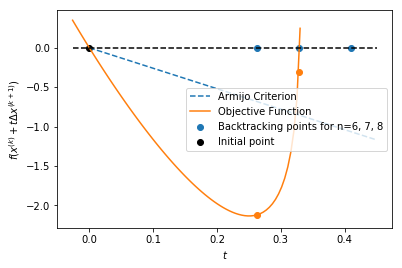

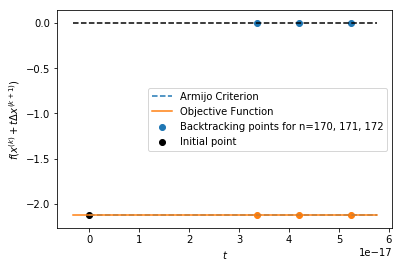

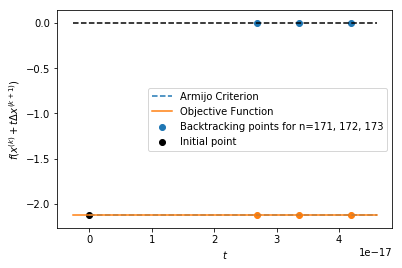

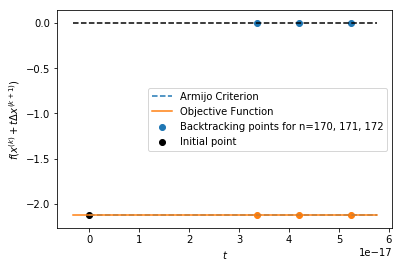

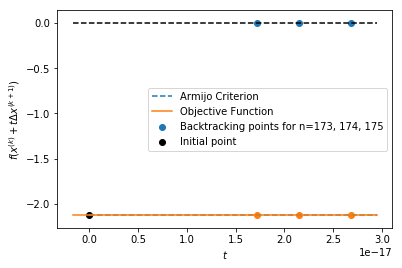

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in log


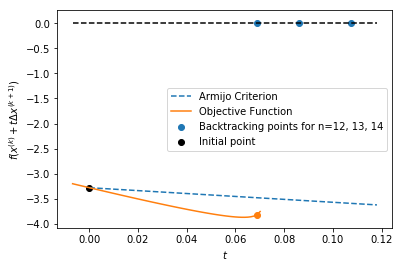

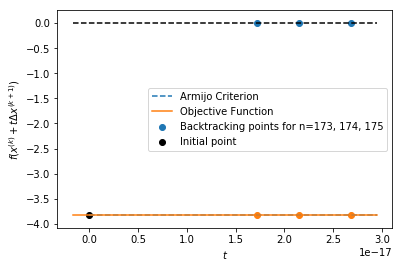

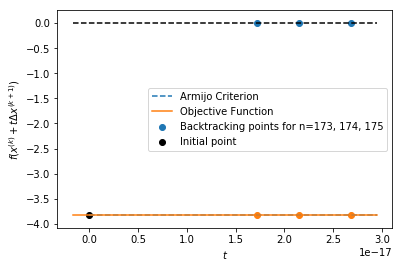

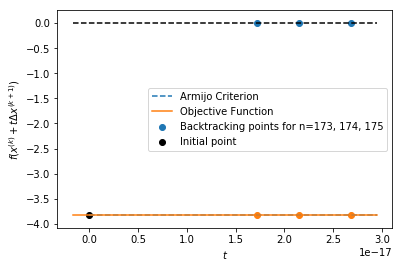

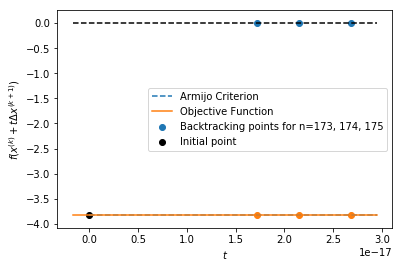

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in log


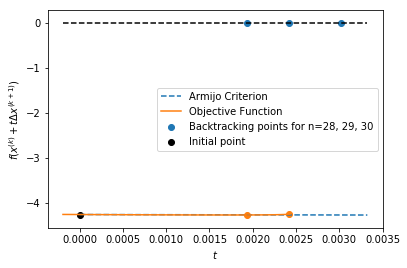

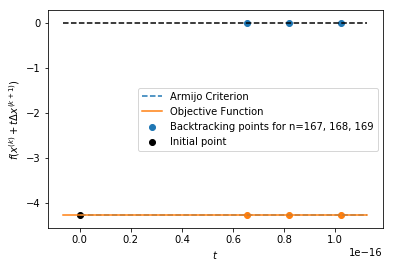

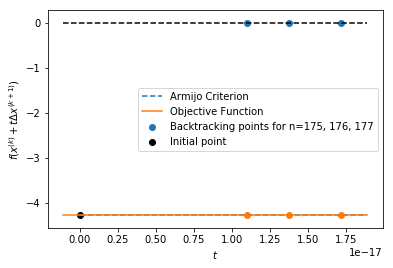

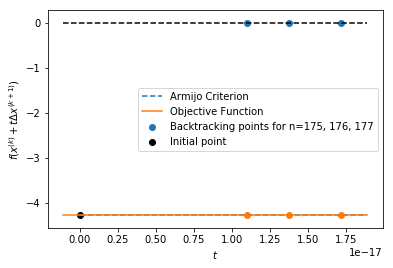

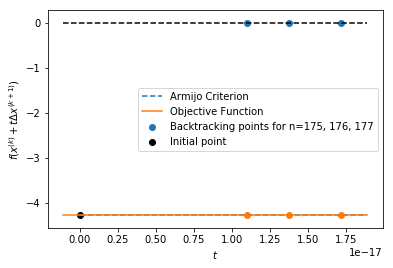

[[ 0.       -0.524288 -0.524288 -0.524288 -0.524288 -0.524288]
 [ 0.       -0.786432 -0.786432 -0.786432 -0.786432 -0.786432]
 [ 0.        0.        0.        0.        0.        0.      ]]
[[-0.524288   -0.66172695 -0.66172695 -0.66172695 -0.66172695 -0.66172695]
 [-0.786432   -0.99259043 -0.99259043 -0.99259043 -0.99259043 -0.99259043]
 [ 0.          0.          0.          0.          0.          0.        ]]
[[-0.66172695 -0.66559552 -0.66559552 -0.66559552 -0.66559552 -0.66559552]
 [-0.99259043 -0.99839327 -0.99839327 -0.99839327 -0.99839327 -0.99839327]
 [ 0.          0.          0.          0.          0.          0.        ]]


NameError: name 'jsglobal' is not defined

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def backtracking(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(ts, [0 for p in ts], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(ts, [f(x0 + q*dx) for q in ts] , label='Backtracking values for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([0], [f0], color='black', label='Initial point')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
        
        return x, xs, fs
    
    else:
        return x

# Two steps of the log barrier method

fun = lambda x: 2*x[0]+3*x[1]
dfun = lambda x: np.array([2,3])
d2fun = lambda x: np.array([[0,0],[0,0]])

h1 = lambda x: -1-x[0]
dh1 = lambda x: np.array([-1,0])
d2h1 = lambda x: np.array([0,0])

h2 = lambda x: -1+x[0]
dh2 = lambda x: np.array([1,0])
d2h2 = lambda x: np.array([0,0])

h3 = lambda x: -1-x[1]
dh3 = lambda x: np.array([0,-1])
d2h3 = lambda x: np.array([0,0])

h4 = lambda x: -1+x[1]
dh4 = lambda x: np.array([0,1])
d2h4 = lambda x: np.array([0,0])

lb1 = lambda x: fun(x) - 1*np.log(-h1(x)) - 1*np.log(-h2(x)) - 1*np.log(-h3(x)) - 1*np.log(-h4(x))
dlb1 = lambda x: dfun(x) + 1*dh1(x)/h1(x) + 1*dh2(x)/h2(x) + 1*dh3(x)/h3(x) + 1*dh4(x)/h4(x)
d2lb1 = lambda x: d2fun(x) + 1*d2h1(x)*h1(x)-dh1(x)**2/h1(x)**2 + 1*d2h2(x)*h2(x)-dh2(x)**2/h2(x)**2 + 1*d2h3(x)*h3(x)-dh3(x)**2/h3(x)**2 + 1*d2h4(x)*h4(x)-dh4(x)**2/h4(x)**2
dx_newt = lambda x: -np.linalg.solve(d2fun(x), dfun(x))

x = np.array([0,0])
alpha = 0.2
beta = 0.8

outer_iter = 5
inner_iter = 3


x1 = np.zeros((3, 6))

x1[:2, 1], xs, fs = backtracking(x1[:2, 0], -dfun(x1[:2,0]), lb1, dlb1(x1[:2,0]), alpha=alpha, beta=beta, verbose=True)
x1[:2, 2], xs, fs = backtracking(x1[:2, 1], -dfun(x1[:2,1]), lb1, dlb1(x1[:2,1]), alpha=alpha, beta=beta, verbose=True)
x1[:2, 3], xs, fs = backtracking(x1[:2, 2], -dfun(x1[:2,2]), lb1, dlb1(x1[:2,2]), alpha=alpha, beta=beta, verbose=True)
x1[:2, 4], xs, fs = backtracking(x1[:2, 3], -dfun(x1[:2,3]), lb1, dlb1(x1[:2,3]), alpha=alpha, beta=beta, verbose=True)
x1[:2, 5], xs, fs = backtracking(x1[:2, 4], -dfun(x1[:2,4]), lb1, dlb1(x1[:2,4]), alpha=alpha, beta=beta, verbose=True)

lb2 = lambda x: fun(x) - 0.1*np.log(-h1(x)) - 0.1*np.log(-h2(x)) - 0.1*np.log(-h3(x)) - 0.1*np.log(-h4(x))
dlb2 = lambda x: dfun(x) + 0.1*dh1(x)/h1(x) + 0.1*dh2(x)/h2(x) + 0.1*dh3(x)/h3(x) + 0.1*dh4(x)/h4(x)
d2lb2 = lambda x: d2fun(x) + 0.1*d2h1(x)*h1(x)-dh1(x)**2/h1(x)**2 + 0.1*d2h2(x)*h2(x)-dh2(x)**2/h2(x)**2 + 0.1*d2h3(x)*h3(x)-dh3(x)**2/h3(x)**2 + 0.1*d2h4(x)*h4(x)-dh4(x)**2/h4(x)**2
#dx_newt2 = lambda x: -np.linalg.solve(d2lb2(x), dlb2(x))

x2 = np.zeros((3, 6))
x2[:2,0] = x1[:2, 5] # initialize at the output of previous step

x2[:2, 1], xs, fs = backtracking(x2[:2, 0], -dfun(x2[:2,0]), lb2, dlb2(x2[:2,0]), alpha=alpha, beta=beta, verbose=True)
x2[:2, 2], xs, fs = backtracking(x2[:2, 1], -dfun(x2[:2,1]), lb2, dlb2(x2[:2,1]), alpha=alpha, beta=beta, verbose=True)
x2[:2, 3], xs, fs = backtracking(x2[:2, 2], -dfun(x2[:2,2]), lb2, dlb2(x2[:2,2]), alpha=alpha, beta=beta, verbose=True)
x2[:2, 4], xs, fs = backtracking(x2[:2, 3], -dfun(x2[:2,3]), lb2, dlb2(x2[:2,3]), alpha=alpha, beta=beta, verbose=True)
x2[:2, 5], xs, fs = backtracking(x2[:2, 4], -dfun(x2[:2,4]), lb2, dlb2(x2[:2,4]), alpha=alpha, beta=beta, verbose=True)

lb3 = lambda x: fun(x) - 0.01*np.log(-h1(x)) - 0.01*np.log(-h2(x)) - 0.01*np.log(-h3(x)) - 0.01*np.log(-h4(x))
dlb3 = lambda x: dfun(x) + 0.01*dh1(x)/h1(x) + 0.01*dh2(x)/h2(x) + 0.01*dh3(x)/h3(x) + 0.01*dh4(x)/h4(x)
d2lb3 = lambda x: d2fun(x) + 0.01*d2h1(x)*h1(x)-dh1(x)**2/h1(x)**2 + 0.01*d2h2(x)*h2(x)-dh2(x)**2/h2(x)**2 + 0.01*d2h3(x)*h3(x)-dh3(x)**2/h3(x)**2 + 0.01*d2h4(x)*h4(x)-dh4(x)**2/h4(x)**2
dx_newt3 = lambda x: -np.linalg.solve(d2lb3(x), dlb3(x))

x3 = np.zeros((3, 6))
x3[:2,0] = x2[:2, 5] # initialize at the output of previous step

x3[:2, 1], xs, fs = backtracking(x3[:2, 0], -dfun(x3[:2,0]), lb3, dlb3(x3[:2,0]), alpha=alpha, beta=beta, verbose=True)
x3[:2, 2], xs, fs = backtracking(x3[:2, 1], -dfun(x3[:2,1]), lb3, dlb3(x3[:2,1]), alpha=alpha, beta=beta, verbose=True)
x3[:2, 3], xs, fs = backtracking(x3[:2, 2], -dfun(x3[:2,2]), lb3, dlb2(x3[:2,2]), alpha=alpha, beta=beta, verbose=True)
x3[:2, 4], xs, fs = backtracking(x3[:2, 3], -dfun(x3[:2,3]), lb3, dlb2(x3[:2,3]), alpha=alpha, beta=beta, verbose=True)
x3[:2, 5], xs, fs = backtracking(x3[:2, 4], -dfun(x3[:2,4]), lb3, dlb2(x3[:2,4]), alpha=alpha, beta=beta, verbose=True)

print(x1)
print(x2)
print(x3)

# Exercise 3
$$\begin{aligned}
\nabla(g\circ f)({\bf x})&=\nabla g(f({\bf x})\\
&=\begin{pmatrix}\frac\partial{\partial x_1}g(f({\bf x})) \\ \frac\partial{\partial x_2}g(f({\bf x})) \\ \vdots \\ \frac\partial{\partial x_n}g(f({\bf x}))\end{pmatrix}\\
\text{(1-Dimension Chain Rule)}&=\begin{pmatrix}g'(f({\bf x}))\frac{\partial f}{\partial x_1}({\bf x}) \\ g'(f({\bf x}))\frac{\partial f}{\partial x_2}({\bf x}) \\ \vdots \\ g'(f({\bf x}))\frac{\partial f}{\partial x_n}({\bf x})\end{pmatrix}\\
&=g'(f({\bf x}))\nabla f({\bf x})\\
\end{aligned}$$

# Exercise 4
(a) $\nabla f_i(x_1,x_2,....,x_n)^T=\begin{pmatrix}\frac{\partial f_i}{\partial x_1}({\bf x}) && \frac{\partial f_i}{\partial x_2}({\bf x}) && \dots && \frac{\partial f_i}{\partial x_n}({\bf x})\end{pmatrix}$  
So, $Df({\bf x})=\begin{pmatrix}\nabla f_1({\bf x})^T \\ \nabla f_2({\bf x})^T \\ \vdots \\ \nabla f_m({\bf x})^T\end{pmatrix}$
  
(b)
$$\begin{aligned}
\nabla (g\circ f)({\bf x})&=\nabla\begin{pmatrix}g_1(f_1({\bf x})) \\ g_2(f_2({\bf x})) \\ \vdots \\ g_m(f_m({\bf x}))\end{pmatrix}\\
&=\begin{pmatrix}\frac{\partial g_1}{\partial f_1}\frac{\partial f_1}{\partial x_1}({\bf x}) \\ \frac{\partial g_2}{\partial f_2}\frac{\partial f_2}{\partial x_2}({\bf x}) \\ \vdots \\ \frac{\partial g_m}{\partial f_m}\frac{\partial f_m}{\partial x_m}({\bf x})\end{pmatrix}
\end{aligned}$$
$$\begin{aligned}
Df({\bf x})^T\nabla g(f({\bf x}))&=\begin{pmatrix}\nabla f_1({\bf x}) && \nabla f_2({\bf x}) && \dots && \nabla f_m({\bf x})\end{pmatrix}\begin{pmatrix}\frac{\partial g_1}{\partial f_1}({\bf x}) \\ \frac{\partial g_2}{\partial f_2}({\bf x}) \\ \vdots \\ \frac{\partial g_m}{\partial f_m}({\bf x})\end{pmatrix}\\
&=\begin{pmatrix}\frac{\partial g_1}{\partial x_1}({\bf x}) \\ \frac{\partial g_2}{\partial x_2}({\bf x}) \\ \vdots \\ \frac{\partial g_m}{\partial x_m}({\bf x})\end{pmatrix}\\
\end{aligned}$$
So, $\nabla (g\circ f)({\bf x})=Df({\bf x})^T\nabla g(f({\bf x}))$
  
(c) 
$$D(g\circ f)({\bf x})=\begin{pmatrix}\nabla(g\circ f)_1({\bf x})^T \\ \nabla(g\circ f)_2({\bf x})^T \\ \vdots \\ \nabla(g\circ f)_m({\bf x})^T\end{pmatrix}$$
$$=\begin{pmatrix}\partial g_1/\partial f_1 && \partial g_1/\partial f_2 && \dots && \partial g_1/\partial f_k \\ \partial g_2/\partial f_1 && \partial g_2/\partial f_2 && \dots && \partial g_2/\partial f_k \\ \vdots && \vdots && \ddots && \vdots \\ \partial g_m/\partial f_1 && \partial g_m/\partial f_2 && \dots && \partial g_m/\partial f_k\end{pmatrix}\begin{pmatrix}\partial f_1/\partial x_1 && \partial f_1/\partial x_2 && \dots && \partial f_1/\partial x_n \\ \partial f_2/\partial x_1 && \partial f_2/\partial x_2 && \dots && \partial f_2/\partial x_n \\ \vdots && \vdots && \ddots && \vdots \\ \partial f_k/\partial x_1 && \partial f_k/\partial x_2 && \dots && \partial f_k/\partial x_n\end{pmatrix}$$
$$=Dg(f({\bf x}))Df({\bf x})$$